# 1º Trabalho IA

## Índice

1. [Introdução](#Introdução)

2. [Objetivo](#Objetivo)

3. [Class ConnectFour](#Class-ConnectFour)

4. [Class Node](#Class-Node)

5. [Menu no Terminal](#Menu-no-Terminal)

6. [Resultados obtidos e discussão](#Resultados-obtidos-e-discussão)

7. [Conclusões](#Conclusões)

## Introdução 

[Go back to the top](#Índice)

Este notebook apresenta uma análise detalhada e a implementação de alguns algoritmos de busca aplicados ao jogo ConnectFour. Estes desempenham um papel fundamental na criação de agentes inteligentes, pois torna estes capazes de tomar decisões em jogos estratégicos, permitindo-lhes explorar possíveis movimentos e escolher a melhor jogada com base em uma determinada heurística, ou com base no resultado de vários simulações.

## Objetivo

[Go back to the top](#Índice)

O objetivo deste trabalho é estudar e comparar o desempenho de diferentes algoritmos de busca no jogo Quatro em Linha. Para isso, implementaremos os seguintes algoritmos:

- AStar: Algoritmo de busca que calcula o melhor movimento utilizando uma combinação entre o custo acumulado e uma heurística.
----
- Monte Carlo Tree Search (MCTS): Algoritmo que determina o melhor movimento através da exploração das possíveis ações em uma árvore utilizando para isso milhares de simulações aleatórias.
----
- Minimax: Um algoritmo de busca exaustiva que avalia todas as jogadas possíveis até uma certa profundidade, atribuindo uma pontuação a cada estado do jogo com base em uma função de heurística.
----
- Alpha-Beta Pruning: Uma otimização do algoritmo Minimax que reduz o número de nós avaliados, eliminando ramos da árvore de busca que não afetam o resultado final.

### Class ConnectFour

[Go back to the top](#Índice)

Esta é a classe principal do nosso trabalho. Aqui estão definidas todas as funções importantes para o funcionamento do jogo, a função de heurística e as implementações principais dos algoritmos.

#### Funcionamento do jogo:

-Função __init__(): Esta função é essencial para a criação da classe ConnectFour e nela estão declarados todos os atributos dos objetos da classe. A maioria dos atributos são bastante simples de entender através do nome.

-Função __is_full__(column): Esta função está responsável por verificar se uma coluna está cheia. Se algum dos valores da lista "columns_height" for igual a -1, significa que a coluna está cheia e por isso retorna True. Caso contrário retorna False.

-Função __is_board_full__(): Esta função retorna True caso o tabuleiro esteja cheio, ou seja, todas as colunas estão cheias. Para verificar isso, a função percorre as 7 colunas chamando a função "is_full". Caso alguma coluna não esteja cheia retorna False, caso contrário retorna True.

-Função __switch_turn__(): Esta função apenas altera o valor do atributo "turn". Caso seja o "X" altera para o "O" e vice versa.

-Função __move__(column,player): Esta função é responsável por fazer os movimentos recebidos. Recebe como argumento a coluna onde vai ser realizado o movimento e o jogador. Começa por verificar se esse movimento é possível e, caso seja, altera para True o valor do atributo impossible_move e retorna False. Se esse movimento for possível, começa por receber o tamanho atual da coluna, através da lista "columns_height". Depois disso atualiza o board e subtrai um nível na lista "columns_height". Por fim atualiza os atributos "impossible_move" e "last_move", chama a função "switch_turn" e retorna True.

-Função __check_winner__(): Esta função está responsável por analisar um estado do tabuleiro e ver se é um estado vencedor. Para isso, a função percorre todas as sequências (horizontais, verticais e diagonais) de 4 peças e verifica se algum jogador venceu. Caso aquele estado seja vencedor, atualiza o atributo "winner" para True e o "player_winner" para o jogador que venceu ("X" ou "O"). Os valores dos ciclos for, foram escolhidos de forma a que a função não aceda a índices fora da matriz "board".

-Função __successors__(): Esta função gera todos os sucessores possíveis de um determinado estado. Para isso executa um ciclo for, cria uma cópia desse tabuleiro e verifica se o movimento nessa coluna é possível. Caso não seja possível, quer na lista "possible_successors" quer na lista "cols", o programa insere nesse coluna None. Se esse movimento for possível, insere na lista "possible_successors o estado após esse movimento e na lista "cols" esse movimento efetuado. No fim retorna as duas listas.
    
#### Função Heurística:

-Função __get_score__(h): Esta função está responsável pela heurística do nosso trabalho. Começa por atribuir os valores das pontuações de acordo com o "h" recebido. De seguida, avalia todos os segmentos possíveis de tamanho 4, verificando se os índices que vão ser avaliados estão na matriz. Se estiverem passa à avaliação desses segmentos e soma ao atributo "score" a pontuação recebida pela função "evaluate_segment".

-Função __evaluate_segment__(segm): Esta função atribui uma pontuação a um segmento de acordo com as regras dadas no enunciado do trabalho.
    
#### Algoritmos:

-__Astar__(h): Nesta função está implementado o funcionamento principal do Astar. A função começa por gerar todos os filhos daquele estado e inicializa as variáveis que vão ser usadas. Para todos os filhos, a função avalia se este é um estado possível e se é vencedor. De seguida, calcula a pontuação e soma 16 pois é o turno do "X". Após isso, verifica se essa pontuação é a mais alta e caso seja substitui a lista anterior pelo melhor movimento. Caso seja igual, acrescenta à lista esse movimento e por fim, se houver dois movimentos com a mesma pontuação, executa um random. Para o jogador "O" faz o mesmo mas ao invés de calcular o máximo, calcula o mínimo pois este é o melhor movimento. Nesta função não foi considerado o custo acumulado pois este é sempre uniforme no decorrer do jogo e por isso não iria alterar os movimentos efetuados (atuando então como um algoritmo greedy).

-__Minimax__(depth,h): Nesta função encontra-se definida a principal estrutura do minimax. Este algoritmo é semelhante ao Astar, pois este baseia-se também numa heurística para calcular o seu movimento. Porém, este tem em conta os movimentos do seu oponente. Então, tendo isto em conta, na sua implementação, decidimos chamar recursivamente esta função até chegar ao nível de profundidade inserido pelo utilizador. Quando chegasse a esse nível, iria calcular a pontuação desse movimento e retorna-la para que no nível acima pudesse ver qual a melhor jogada dos filhos.

-__AlphaBeta__(depth,alpha,beta,h): Nesta função está implementado o AlphaBeta Pruning. Esta função é praticamente igual à função Minimax, apenas tem uma condição que utiliza as variáveis alpha e beta para eliminar ramos da árvore de busca que não afetam o resultado final.

-__MonteCarlo__(root_node,simulations,c): Nesta função encontra-se implementada a lógica do algoritmo MonteCarlo. Começamos por expandir a raíz para evitar erros de inicialização. De seguida, até às simulações inseridas pelo utilizador, o algoritmo começa por igualar o nó à root. Depois, enquanto este nó não for uma folha (enquanto tiver filhos), vai selecionando o melhor nó. Quando chegar a um nó folha começa por verificar se este estado é um estado terminal (estado em que ocorreu uma vitória ou empate) e, caso seja simulate a partir desse nó e dá backpropagate do resultado dessa simulação. Se este nó não for terminal, é verificado se este já foi visitado ou não. Se ainda não foi visitado, simula a partir desse nó e dá backpropagate. Caso já tenha sido visitado pelo menos uma vez, significa que os seus irmãos também já foram visitados e por isso já pode expandir. Após essa expansão volta a selecionar o melhor nó (vai ser aleatório pois os nós gerados não vão ter qualquer visita), simula a partir desse nó e dá backpropagate desse resultado.
    
    
    
    

In [ ]:
import copy
import random

rows=6
cols=7

class ConnectFour:
    def __init__(self):
        self.board = [["-"] * 7 for _ in range(6)]
        self.columns_height = [5 for _ in range(7)]
        self.winner = False
        self.player_winner= None                                
        self.impossible_move=False
        self.turn="X"
        self._score = 0
        self.last_move = None
        
    
    def is_full(self, column):                           
        if self.columns_height[column]== -1:
            return True
        return False
    
    def is_board_full(self):
        for row in range(len(self.board)):
            if not self.is_full(row):
                return False
        return True

    
    def switch_turn(self):   
        if self.turn == "O":
            self.turn = "X"
        else:
            self.turn = "O"
    
    def move(self,column, player):
        if column < 0 or column > 6 or self.is_full(column):
            self.impossible_move=True
            return False                                   
        
        else:
            row = self.columns_height[column]    # Para saber a altura atual da coluna
            self.board[row][column] = player     # Faz o movimento no tabuleiro
            self.columns_height[column] -= 1     # Diminui em 1 a altura da coluna
            self.impossible_move=False
            self.switch_turn()                   # Troca de turno
            self.last_move = column              # Guarda o ultimo movimento
            return True
    
    def get_score(self,h):
        
        a=512
        b=e=50
        c=f=10
        d=g=1
        
        
        if h=="3":                #DIFICULDADE DIFICIL
            e=10
            f=5
            
        if h=="2":                #DIFICULDADE MEDIA
            a=1000
            e=10
            f=5
            d=5
            c=50
            b=100
        
        def evaluate_segment(segm):
            
            if self.player_winner == "X":
                return a
            
            elif self.player_winner == "O":
                return -a

            elif "O" in segm and "X" not in segm:
                if segm.count("O") == 3:
                    return -e
                elif segm.count("O") == 2:
                    return -f
                elif segm.count("O") == 1:
                    return -g
                
            elif segm.count("-") == 4:
                return 0
            
            elif "X" in segm and "O" not in segm:
                if segm.count("X") == 1:
                    return d
                elif segm.count("X") == 2:
                    return c
                elif segm.count("X") == 3:
                    return b            

            return 0


        # Avaliar todos os segmentos possíveis de tamanho 4
        self._score = 0
        
        for i in range(6):     # Analisar as linhas
            for j in range(4):
                if j + 3 < 7:  # Verificar se os índices estão na matriz
                    segment = [self.board[i][j + k] for k in range(4)]
                    self._score += evaluate_segment(segment)
        
        for i in range(4):     # Analisar as colunas
            for j in range(7):
                if i + 3 < 6:  # Verificar se os índices estão na matriz
                    segment = [self.board[i + k][j] for k in range(4)]
                    self._score += evaluate_segment(segment)
                    
        for i in range(3):     # Analisar primeira diagonal
            for j in range(4):
                if i + 3 < 6 and j + 3 < 7:  # Verificar se os índices estão na matriz
                    segment = [self.board[i + k][j + k] for k in range(4)]
                    self._score += evaluate_segment(segment)
                    
        for i in range(3):     # Analisar segunda diagonal (esquerda para a direita a subir)
            for j in range(3, 7):
                if i + 3 < 6 and j - 3 >= 0:  # Verificar se os índices estão na matriz
                    segment = [self.board[i + k][j - k] for k in range(4)]
                    self._score += evaluate_segment(segment)

        return self._score 
    
    
    def check_winner(self):
        
        #Verifica as horizontais
        for i in range(rows):
            for j in range(4):
                if self.board[i][j] == self.board[i][j+1] == self.board[i][j+2] == self.board[i][j+3] != '-':
                    self.winner=True
                    self.player_winner=self.board[i][j]
                    return True
                
        #Verifica as verticais
        for i in range(3):
            for j in range(cols):
                if self.board[i][j] == self.board[i+1][j] == self.board[i+2][j] == self.board[i+3][j] != '-':
                    self.winner=True
                    self.player_winner=self.board[i][j]
                    return True
                
        #Verifica a primeira diagonal
        for i in range(3):
            for j in range(4):
                if self.board[i][j] == self.board[i+1][j+1] == self.board[i+2][j+2] == self.board[i+3][j+3] != '-':
                    self.winner=True
                    self.player_winner=self.board[i][j]
                    return True
        
        #Verifica a segunda diagonal
        for i in range(3,6):
            for j in range(4):
                if self.board[i][j] == self.board[i-1][j+1] == self.board[i-2][j+2] == self.board[i-3][j+3] != '-':
                    self.winner=True
                    self.player_winner=self.board[i][j]
                    return True
        
    
    def successors(self):
        cols=[]
        possible_successors=[]
        for i in range(0,7):
            successor=copy.deepcopy(self)
            if successor.move(i,self.turn):                   
                possible_successors.append(successor)         
                cols.append(i)                               
            
            else:
                possible_successors.append(None)
                cols.append(None)
                
        return possible_successors,cols

    def Astar(self, h):
        filhos, _ = self.successors()
        maximo = -float('inf')         
        minimo = float('inf')         
        melhor_movimento = None
        movimentos_iguais_max = []
        movimentos_iguais_min = []

        if self.turn == "X":
            for i in range(7):  
                if (filhos[i]==None):
                    continue
                filhos[i].check_winner()
                temp = filhos[i].get_score(h) + 16
                if temp > maximo:
                    maximo = temp
                    movimentos_iguais_max = [i]           #Caso seja maior a lista anterior é substituida pelo melhor movimento
                elif temp == maximo:
                    movimentos_iguais_max.append(i)       #Caso haja dois movimentos com pontuaçao igual acrescenta a lista 

            if movimentos_iguais_max:
                melhor_movimento = random.choice(movimentos_iguais_max)      #Faz random caso hajam dois movimentos 
                                                                             #ou mais com a mesma pontuaçao 
            return maximo, melhor_movimento

        elif self.turn == "O":
            for i in range(7):
                if (filhos[i]==None):
                    continue
                filhos[i].check_winner()
                temp = filhos[i].get_score(h) - 16
                if temp < minimo:
                    minimo = temp
                    movimentos_iguais_min = [i]
                elif temp == minimo:
                    movimentos_iguais_min.append(i)

            if movimentos_iguais_min:
                melhor_movimento = random.choice(movimentos_iguais_min)
            return minimo, melhor_movimento

        return None

    def minimax(self, depth,h):
        if depth == 0 or self.check_winner() or self.is_board_full():
            return self.get_score(h), None

        maximizing_player = self.turn == "X"
        best_move = None
        if maximizing_player:
            max_eval = float('-inf')
            filhos, _ = self.successors()
            for i in range(len(filhos)):
                if (filhos[i]==None):
                    continue
                temp, _ = filhos[i].minimax(depth - 1, h)
                if temp > max_eval:
                    max_eval = temp
                    best_move = i
            return max_eval, best_move
        else:
            min_eval = float('inf')
            filhos, _ = self.successors()
            for i in range (len(filhos)):
                if (filhos[i]==None):
                    continue
                temp, _ = filhos[i].minimax(depth - 1, h)
                if temp < min_eval:
                    min_eval = temp
                    best_move = i
            return min_eval, best_move
    
    def alphabeta(self, depth, alpha, beta, h):
        if depth == 0 or self.check_winner() or self.is_board_full():
            return self.get_score(h), None

        maximizing_player = self.turn == "X"
        best_move = None
        if maximizing_player:
            max_eval = float('-inf')
            filhos, _ = self.successors()
            for i, filho in enumerate(filhos):
                if filho is None:
                    continue
                temp, _ = filho.alphabeta(depth - 1, alpha, beta, h)
                if temp > max_eval:
                    max_eval = temp
                    best_move = i
                alpha = max(alpha, max_eval)
                if alpha >= beta:
                    break  # Corte beta
            return max_eval, best_move
        else:
            min_eval = float('inf')
            filhos, _ = self.successors()
            for i, filho in enumerate(filhos):
                if filho is None:
                    continue
                temp, _ = filho.alphabeta(depth - 1, alpha, beta, h)
                if temp < min_eval:
                    min_eval = temp
                    best_move = i
                beta = min(beta, min_eval)
                if alpha >= beta:
                    break  # Corte alfa
            return min_eval, best_move
        
            
    def monte_carlo(self,root_node, simulations,c):
        
        root_node.expand()
        
        for _ in range(simulations):
            
            node = root_node
            
            while not node.is_leaf():

                node, visitado = node.select_child(c)
            
            if node.is_terminal:
                resultado=node.simulate()
                node.backpropagate(resultado)
                
            else:
                if not visitado:

                    resultado=node.simulate()
                    node.backpropagate(resultado)

                if visitado:

                    node.expand()
                    node, visitado = node.select_child(c)
                    resultado=node.simulate()
                    node.backpropagate(resultado)

    
    def __str__(self):
        board_string = "\n"
        board_string += "0 1 2 3 4 5 6\n"  # Índices das colunas
        for row in self.board:
            board_string += " ".join(row) + "\n"
        return board_string


        
    

### Class Node

[Go back to the top](#Índice)

Nesta classe encontra-se definido as funções para o funcionamento do Monte Carlo, sendo elas as seguintes:

- __init__(): Esta função é essencial para a criação da classe Node e nela estão declarados todos os atributos dos objetos da classe. A maioria dos atributos são bastante simples de entender através do nome.

- __is_leaf__(): Esta função verifica se um nó tem filhos e retorna esse resultado.

- __is_terminal__(): Esta função averigua se um nó é terminal, ou seja, se há alguma vitória ou empate. Caso haja retorna True, senão retorna False.

- __ucb1_value__(child,c): Nesta função é calculado o valor da expressão do Upper Confidence Bound de um filho. No entanto, para dar prioridade aos nós que ainda não foram visitados, caso um nó não tenha visitas, retorna infinito para dar prioridade a esse nó.

- __select_child__(c): Esta função está responsável pela fase de seleção. Aqui é escolhido o melhor nó de acordo com a pontuação dada pela função "ucb1_value". A função está ainda responsável por verificar se um nó já foi visitado. Essa condição é feita através da melhor pontuação ucb. Caso a melhor pontuação seja infinito, quer dizer que o melhor nó ainda não foi visitado e por isso retorna o nó em questão e False. Por sua vez, caso essa pontuação não seja infinito, significa que todos os nós já foram visitados pelo menos uma vez e então, retorna o melhor nó e True.

- __expand__(): Esta função é responsável pela fase de expansão. Nesta fase, são gerados todos os filhos do estado atual e, caso não sejam nulos, são criados nós para esses filhos e estes são adicionados à lista dos filhos do nó atual. É também acrescentado esse movimento à lista move, para depois saber qual o mlehor movimento.

- __simulate__(): Nesta função ocorre a fase de simulação. Primeiramente é criada uma cópia do estado atual para poderem ser executados os movimentos aleatórios. De seguida são calculados os movimentos possíveis e depois é escolhido um movimento aleatório dessa lista. Estes passos são feitos até haver um vencedor ou um empate. Quando houver é retornada a pontuação desse estado de acordo com as condições impostas (1 em caso de vitória do computador, 0 em caso de derrota e 0.5 em caso de empate).

- __backpropagate__(result): Aqui encontra-se a fase de backpropagation. Nesta função é transmitido o resultado da simulação aos pais, até chegar à raiz. 

In [ ]:
from time import time
import math

class Node:
    def __init__(self,game,jogador,parent=None):
        self.game=game
        self.parent=parent
        self.children=[]
        self.wins=0
        self.visits=0
        self.jogador=jogador
        self.move=[]
    
    def is_leaf(self):
        return len(self.children) == 0
    
    def is_terminal(self):
        if self.game.check_winner() or self.game.is_board_full():
            return True
        return False
    
    def ucb1_value(self, child,c):
        if child.visits == 0:
            return float('inf')  # Retorna infinito se o filho não foi visitado para garantir que seja selecionado
        
        exploration_factor = c  # Fator de exploração (pode ser ajustado conforme necessário)
        exploitation_value = child.wins / child.visits 
        exploration_value = exploration_factor * math.sqrt(2 * math.log(self.visits) / child.visits)
        return exploitation_value + exploration_value
    
    def select_child(self,c):
        if not self.children:
            print("Nenhum filho disponível")
            return None  # Se não houver filhos, retorna None
        
        best_child = None
        best_ucb = float('-inf')
        for child in self.children:
            ucb = self.ucb1_value(child,c)
            if ucb > best_ucb:
                best_ucb = ucb
                best_child = child
                
        if best_ucb == float('inf'):
            return best_child, False
        else:
            return best_child, True
    
    def expand(self):
        if self.game.check_winner() or self.game.is_board_full():
            print("Jogo já terminou, não há nada para expandir")
            return  False # Se o jogo já estiver terminado, não há nada para expandir

        filhos, col = self.game.successors()  # Obtém os sucessores do estado atual do jogo

        for i in range (len(filhos)):
            if filhos[i] == None:
                continue
            else:
                child_node = Node(filhos[i], self.jogador, parent=self)  # Cria um nó para cada sucessor
                self.children.append(child_node)  # Adiciona o nó como filho do nó atual
                self.move.append(col[i])
        return True

    def simulate(self):
        current_game = copy.deepcopy(self.game)
        while not (current_game.check_winner() or current_game.is_board_full()):
            possible_moves = [col for col in range(7) if not current_game.is_full(col)]
            if possible_moves:
                random_move = random.choice(possible_moves)  # Escolhe um movimento possível aleatório
                current_game.move(random_move, current_game.turn)
            else:
                break  # Se não houver movimentos possíveis, interrompe a simulação
        if current_game.check_winner():
            if current_game.player_winner == "X" and self.jogador == "O":
                return 0  # Vitória para X com o O como jogador
            elif current_game.player_winner == "O" and self.jogador == "O":
                return 1  # Vitória para O com o O como jogador
            elif current_game.player_winner == "X" and self.jogador == "X":
                return 1  # Vitória para o X com o X como jogador
            elif current_game.player_winner == "O" and self.jogador == "X":
                return 0  # Vitória para o O com o X como jogador
        else:
            return 0.5  # Empate
    
    def backpropagate(self, result):
        self.visits += 1
        self.wins += result
        if self.parent:  #  Chegou à raiz, não precisa de propagar mais para cima
            self.parent.backpropagate(result)
        
    def __str__(self):
        node_str = f"Game state: {self.game}\n"
        node_str += f"Wins: {self.wins}, Visits: {self.visits}\n"
        #node_str += f"Percentage: {node.ucb1_value()}"
        return node_str
        

### Menu no Terminal

[Go back to the top](#Índice)

Para melhor visualização e interatividade do nosso trabalho e o utilizador, decidimos criar um menu simples. Nesta primeira célula estão definidas as funções "player_player", "player_algorithm" e "algorithm_algorithm". Estas funções são bastante simples e são responsáveis por (após o calculo da melhor jogada) efetuar as jogadas, verificar se algum jogador ganhou (ou se houve empate), imprimir o tabuleiro após cada jogada e calcular o tempo de cada jogada dos algoritmos. É aqui que também é feita a troca manual da profundidade de busca do Minimax/AlphaBeta, do valor do c e do método de escolha do último nó do Monte Carlo.

In [ ]:
from IPython.display import clear_output
import time

def player_player(game):
    print(game)
    while not (game.winner or game.is_board_full()):
        
        if game.turn=="X":
            n=int(input(f"Player {game.turn}  turn: "))
        else:
            n=int(input(f"Player {game.turn} turn: "))
            
        if not game.move(n, game.turn):
            print("Impossible move! Try again.")
        else:
            game.check_winner()
            print (game)
        
    
    if game.winner:
        print("Game Over! Player", game.player_winner, "wins!!")
        choice = input("Do you wanna play again? (y/n) ")
        if choice=="y":
            clear_output()
            menu_inicial()
    else:
        print("Game Over! It's a draw")
        choice = input("Do you wanna play again? (y/n) ")
        if choice=="y":
            clear_output()
            menu_inicial()
            
def player_algorithm(game,algorithm,h,jogador):
    print(game)
    
    while not (game.winner or game.is_board_full()):
        
        if jogador == True:
            n=int(input(f"Player {game.turn}  turn: ")) 
            if not game.move(n, game.turn):
                print("Impossible move! Try again.")
            else:
                game.check_winner()
                print(game)
            jogador = False
        else:
            if algorithm == '1':             #A Star
                if not game.check_winner():
                    
                    start_time = time.time()

                    _,prox_move=game.Astar(h)

                    game.move(prox_move,game.turn)
                    
                    end_time = time.time()
                    elapsed_time = end_time - start_time
                    print(f"AStar time: {elapsed_time} seconds")
                    
                    game.check_winner()
                print(game)
            
            elif algorithm == '2':            # Monte carlo
                if not game.check_winner():
                    
                    start_time = time.time()
                    
                    c= 0.5                    #Pode ser alterado o valor do C
                    root_node = Node(game,game.turn)
                    game.monte_carlo(root_node, h,c)
                    
                    ucb=float('-inf')
                    best_ratio=float('-inf')
                    best_visits=float('-inf')
                    
                    for i in range(len(root_node.children)):
                        #print(f"Vitórias do filho {root_node.move[i]}: {root_node.children[i]} ")
                        #print(f"Visitas do filho {root_node.move[i]}: {root_node.children[i]} ")
                        #print(f"Pontuação do filho: {root_node.ucb1_value(root_node.children[i])}")
                        
                        ratio=root_node.children[i].wins/root_node.children[i].visits
                        
                        if root_node.children[i].visits > best_visits:
                            best_move_visits = root_node.move[i]
                            best_visits = root_node.children[i].visits 
                        
                        if ratio > best_ratio:
                            best_move_ratio = root_node.move[i]
                            best_ratio = ratio

                        if root_node.ucb1_value(root_node.children[i],c) > ucb:
                            best_move = root_node.move[i]
                            ucb = root_node.ucb1_value(root_node.children[i],c)

                    #print(f"Best Move Ratio: {best_move_ratio}")
                    #print(f"Best Move UCB: {best_move}")
                    #print(f"Best Visits: {best_move_visits}")
                    
                    game.move(best_move_ratio, game.turn) #Aqui podemos alterar para UCB/RATIO

                    end_time = time.time()
                    elapsed_time = end_time - start_time
                    print(f"MonteCarlo time: {elapsed_time} seconds")

                    game.check_winner()

                print(game)
                    
            
            elif algorithm == '3':             #Minimax
                
                if not game.check_winner():
        
                    start_time = time.time()
            
                    _,prox_move=game.minimax(5,h)     #Pode ser alterada a profundidade
            
                    game.move(prox_move,game.turn)
                
                    end_time = time.time()
                    elapsed_time = end_time - start_time
                    print(f"Minimax time: {elapsed_time} seconds")
                
                    game.check_winner()
                
                print(game)
            
            elif algorithm == '4':             #AlphaBeta
                
                alpha = float('-inf')
                beta = float('inf')
                
                if not game.check_winner():
                    
                    start_time = time.time()
                    
                    _,prox_move=game.alphabeta(5,alpha,beta,h) #Pode ser alterada a profundidade
            
                    game.move(prox_move,game.turn)
                
                    end_time = time.time()
                    elapsed_time = end_time - start_time
                    print(f"AlphaBeta time: {elapsed_time} seconds")
                
                    game.check_winner()
                
                print(game)
            
            jogador = True
        
    
    if game.winner:
        print("Game Over! Player", game.player_winner, "wins!!")
        choice = input("Do you wanna play again? (y/n) ")
        if choice=="y":
            clear_output()
            menu_inicial()
    else:
        print("Game Over! It's a draw")
        choice = input("Do you wanna play again? (y/n) ")
        if choice=="y":
            clear_output()
            menu_inicial()

def algorithm_algorithm(game,algorithm_X,algorithm_O,h_X,h_O,testes):
    if testes == 1:
        print(game)
    
    
    while not (game.winner or game.is_board_full()):
    
        if game.turn=="X":
            if algorithm_X == '1':         #AStar
                if not game.check_winner():
                    
                    start_time = time.time()
            
                    _,prox_move=game.Astar(h_X)
                    game.move(prox_move,game.turn)
                    
                    end_time = time.time()
                    elapsed_time = end_time - start_time
                    print(f"X time: {elapsed_time} seconds")
                    
                    game.check_winner()
                    
                if testes == 1:
                    print(game)
            
            if algorithm_X == '2':          #Monte Carlo
                if not game.check_winner():
                    
                    start_time = time.time()
                    
                    c=0.5            #Pode ser alterado o valor do C
                    root_node = Node(game,game.turn)
                    game.monte_carlo(root_node, h_X,c) 
                    
                    ucb=float('-inf')
                    best_ratio=float('-inf')
                    best_visits=float('-inf')
                    
                    for i in range(len(root_node.children)):
                        #print(f"Vitórias do filho {root_node.move[i]}: {root_node.children[i]} ")
                        #print(f"Visitas do filho {root_node.move[i]}: {root_node.children[i]} ")
                        #print(f"Pontuação do filho: {root_node.ucb1_value(root_node.children[i])}")
                        
                        ratio=root_node.children[i].wins/root_node.children[i].visits
                        
                        if root_node.children[i].visits > best_visits:
                            best_move_visits = root_node.move[i]
                            best_visits = root_node.children[i].visits 
                        
                        if ratio > best_ratio:
                            best_move_ratio = root_node.move[i]
                            best_ratio = ratio

                        if root_node.ucb1_value(root_node.children[i],c) > ucb:
                            best_move = root_node.move[i]
                            ucb = root_node.ucb1_value(root_node.children[i],c)

                    #print(f"Best Move Ratio: {best_move_ratio}")
                    #print(f"Best Move UCB: {best_move}")
                    #print(f"Best Visits: {best_move_visits}")
                    
                    game.move(best_move_ratio, game.turn) #Aqui podemos alterar para UCB/RATIO

                    end_time = time.time()
                    elapsed_time = end_time - start_time
                    print(f"X time: {elapsed_time} seconds")

                    game.check_winner()

                        
                if testes == 1: 
                    print(game)
            
            if algorithm_X == '3':           #Minimax
                if not game.check_winner():
                    
                    start_time = time.time()
                    
                    _,prox_move=game.minimax(5,h_X) #Pode ser alterada a profundidade
                    game.move(prox_move,game.turn)
                    
                    end_time = time.time()
                    elapsed_time = end_time - start_time
                    print(f"X time: {elapsed_time} seconds")
                    
                    game.check_winner()
                if testes == 1:
                    print(game)
            
            elif algorithm_X == '4':             #AlphaBeta
                alpha = float('-inf')
                beta = float('inf')
                if not game.check_winner():
                    
                    start_time = time.time()
                    
                    _,prox_move=game.alphabeta(5,alpha,beta,h_X) #Pode ser alterada a profundidade
                    game.move(prox_move,game.turn)
                    
                    end_time = time.time()
                    elapsed_time = end_time - start_time
                    print(f"X time: {elapsed_time} seconds")
                    
                    game.check_winner()
                if testes == 1:
                    print(game)
            
        if game.turn=="O":
            
            if algorithm_O == '1':            #Astar
                
                if not game.check_winner():
                    
                    start_time = time.time()
                    
                    _,prox_move=game.Astar(h_O)
                    game.move(prox_move,game.turn)
                    
                    end_time = time.time()
                    elapsed_time = end_time - start_time
                    print(f"O time: {elapsed_time} seconds")
                    
                    game.check_winner()
                
                if testes == 1:
                    print(game)
            
            if algorithm_O == '2':           #Monte Carlo
                
                if not game.check_winner():
                    
                    start_time = time.time()
                    
                    c=0.5                    #Pode ser alterado o valor do C
                    root_node = Node(game,game.turn) 
                    game.monte_carlo(root_node, h_O,c)
                    
                    ucb=float('-inf')
                    best_ratio=float('-inf')
                    best_visits=float('-inf')
                    
                    for i in range(len(root_node.children)):
                        #print(f"Vitórias do filho {root_node.move[i]}: {root_node.children[i].wins} ")
                        #print(f"Visitas do filho {root_node.move[i]}: {root_node.children[i].visits} ")
                        #print(f"Pontuação do filho: {root_node.ucb1_value(root_node.children[i],c)}")
                        
                        ratio=root_node.children[i].wins/root_node.children[i].visits
                        
                        if root_node.children[i].visits > best_visits:
                            best_move_visits = root_node.move[i]
                            best_visits = root_node.children[i].visits 
                        
                        if ratio > best_ratio:
                            best_move_ratio = root_node.move[i]
                            best_ratio = ratio

                        if root_node.ucb1_value(root_node.children[i],c) > ucb:
                            best_move = root_node.move[i]
                            ucb = root_node.ucb1_value(root_node.children[i],c)

                    #print(f"Best Move Ratio: {best_move_ratio}")
                    #print(f"Best Move UCB: {best_move}")
                    #print(f"Best Visits: {best_move_visits}")
                    
                    game.move(best_move_ratio, game.turn) #Aqui podemos alterar para UCB/RATIO

                    end_time = time.time()
                    elapsed_time = end_time - start_time
                    print(f"O time: {elapsed_time} seconds")

                    game.check_winner()

                
                if testes == 1: 
                    print(game)
            
            if algorithm_O == '3':          #Minimax
                
                if not game.check_winner():
                    
                    start_time = time.time()
                    
                    _,prox_move=game.minimax(5,h_O)    #Pode alterar a profundidade
                    game.move(prox_move,game.turn)
                    
                    end_time = time.time()
                    elapsed_time = end_time - start_time
                    print(f"O time: {elapsed_time} seconds")
                    
                    game.check_winner()
                
                if testes == 1:
                    print(game)
                    
            if algorithm_O == '4':             #AlphaBeta 
                alpha = float('-inf')
                beta = float('inf')
                
                if not game.check_winner():  
                    
                    start_time = time.time()
                    
                    _,prox_move=game.alphabeta(5,alpha,beta,h_O)    #Pode alterar a profundidade
                    game.move(prox_move,game.turn)
                    
                    end_time = time.time()
                    elapsed_time = end_time - start_time
                    print(f"O time: {elapsed_time} seconds")
                    
                    game.check_winner()
                
                if testes == 1:
                    print(game)
                    
    if testes == 1:    
        
        if game.winner:
            print("Game Over! Player", game.player_winner, "wins!!")
            choice = input("Do you wanna play again? (y/n) ")
            if choice=="y":
                clear_output()
                menu_inicial()
        
        else:
            
            print("Game Over! It's a draw")
            choice = input("Do you wanna play again? (y/n) ")
            if choice=="y":
                clear_output()
                menu_inicial()
    else:
        
        if game.winner:
            print(game)
            print(f"Game Over! Player {game.player_winner} wins!!")
            print("\n")
        
        else:
            print(game)
            print(f"Game Over! It's a draw")

Nesta célula estão definidos os vários menus e as escolhas do utilizador. No caso do modo "Algorithm vs Algorithm", caso sejam selecionados mais do que 1 teste, apenas é apresentado o estado do tabuleiro final e o resultado. Se for selecionado apenas 1 teste, são apresentados todos os movimentos feitos pelos algoritmos.

In [ ]:
def menu_inicial():
    print("Welcome to Connect Four!")
    print("Choose your mode")
    print("1. Player vs Player")
    print("2. Player vs Algorithm")
    print("3. Algorithm vs Algorithm")
    print("4. Quit")
    
    choice = input("Enter your choice: ")
    
    if choice == '1':
        game = ConnectFour()
        player_player(game)
        
    elif choice == '2':
        clear_output()
        algorithm = menu_algoritmos()
        h = 0
        
        if algorithm == '1':
            clear_output()
            h = menu_dificuldade()
            clear_output()
            comeca = menu_jogador()

            if comeca == '1':
                jogador = True
            else:
                jogador = False

            game = ConnectFour()
            player_algorithm(game,algorithm,h,jogador)
        
        elif algorithm == '2':
            clear_output()
            iteracoes = menu_iteracoes()
            clear_output()
            comeca = menu_jogador()

            if comeca == '1':
                jogador = True
            else:
                jogador = False

            game = ConnectFour()
            player_algorithm(game,algorithm,iteracoes,jogador)
        
        elif algorithm == '3':
            clear_output()
            comeca = menu_jogador()

            if comeca == '1':
                jogador = True
            else:
                jogador = False

            game = ConnectFour()
            player_algorithm(game,algorithm,h,jogador)
        
        elif algorithm == '4':
            clear_output()
            
            clear_output()
            comeca = menu_jogador()

            if comeca == '1':
                jogador = True
            else:
                jogador = False

            
            game = ConnectFour()
            player_algorithm(game,algorithm,h,jogador)
    
    elif choice == '3':
        
        count_X = 0
        count_O = 0
        count_draw = 0
        
        clear_output()
        testes = menu_testes()
        clear_output()
        algorithm_X, h_X = menu_algoritmo_algoritmo("X")
        clear_output()
        algorithm_O, h_O = menu_algoritmo_algoritmo("O")
        clear_output()
        
        for i in range (testes):
            game = ConnectFour()
            algorithm_algorithm(game, algorithm_X, algorithm_O, h_X, h_O, testes)
            if game.player_winner == "X":
                count_X += 1
            elif game.player_winner == "O":
                count_O += 1
            else:
                count_draw += 1
                
        if testes != 1:
            print(f"Vitorias do jogador X: {count_X}")
            print(f"Vitorias do jogador O: {count_O}")
            print(f"Empates: {count_draw}")
        
    elif choice == '4':
        print("Exiting the game. Goodbye!")
        
def menu_algoritmos():
    print("Please choose the algorithm")
    print("1. A*")
    print("2. Monte carlo")
    print("3. Minimax")
    print("4. AlphaBeta")
    print("5. Back")
    
    algorithm = input("Enter your choice: ")
    
    if algorithm == '5':
        clear_output()
        menu_inicial()
    
    return algorithm
    
def menu_dificuldade():
    print("Please choose the difficulty")
    print("1. Easy")
    print("2. Medium")
    print("3. Hard")
    
    difficulty = input("Enter your choice: ")
    
    return difficulty

def menu_algoritmo_algoritmo(jogador):
    print(f"Please choose the player {jogador} algorithm")
    print("1. A*")
    print("2. Monte carlo")
    print("3. Minimax")
    print("4. AlphaBeta")
    print("5. Back")
    
    algorithm = input("Enter your choice: ")
    
    h=0
    
    if algorithm == '1':
        clear_output()
        h = menu_dificuldade()
    
    if algorithm == '2':
        clear_output()
        h = menu_iteracoes()
    
    return algorithm, h

def menu_testes():

    testes = int(input("Enter the number of tests (min 1): "))
    
    return testes

def menu_profundidade():
    
    profundidade = int(input("Enter the depth (min 1): "))
    
    return profundidade

def menu_iteracoes():
    
    iteracoes = int(input("Enter the iterations (min 1): "))
    
    return iteracoes

def menu_jogador():
    
    print(f"Please choose the player to start")
    print("1. You")
    print("2. Computer")
    comeca = input("Enter your choice: ")
    
    return comeca
    
menu_inicial()

## Resultados obtidos e discussão

[Go back to the top](#Índice)

### Diferença entre métodos de escolha do nó final

Para esta análise, efetuamos 10 jogos entre o AlphaBeta e o Monte Carlo para poder observar qual o melhor comportamento para 10k iteracoes

1. Através da análise destes dados, podemos concluir que para 10k iterações, o melhor método para escolher o nó final de forma a efetuar o movimento é através do nó que tem maior ratio. Analisemos um caso em específico:

Aqui, sendo a vez do jogador "O" (MonteCarlo), segundo a pontuação UCB, o algoritmo prefere colocar na coluna 5 e assim fazer uma sequência de 3, ao invés de impedir a vitória do jogador "X" na coluna 6. Já se utilizarmos como referência as Visitas/Ratio para o movimento final, este já prefere impedir a vitória do seu adversário.

2. Analisando as escolhas do Ratio e do Visits, apercebemo-nos que ambas escolhem sempre (ou quase sempre) o mesmo. Sendo assim para o resto do trabalho decidimos usar o Ratio e o UCB, omitindo assim o Visits.

3. Efetuados estes testes, notámos que 10k iterações eram poucas pois este perdia bastantes vezes contra o MinMax/AlphaBeta. Deste modo, decidimos aumentar as iterações para 20k. Em termos de tempo, este aumentou de 3/4 segundos para 9/10 segundos, o que nos pareceu bastante razoável.

### Análise da constante C

#### AlphaBeta vs MonteCarlo 

Passamos agora para a análise do balanço entre a exploitation e a exploration. Para este estudo foram realizados 10 testes para cada alteração, sendo elas as seguintes:

- Diferente escolha do nó final (Ratio/UCB)

- Diferentes valores do C:

    - 0.5 (Valorização da exploitation)
    
    - √2  (Valor "neutro")
    
    - 2   (Valorização da exploration)

Conclusões:

1. Após a visualização dos resultados obtidos, podemos observar que o melhor valor para a constante C é 0.5. Isto deve-se ao facto do nosso algoritmo, quando o valor de C aumenta, fazer movimentos errados. Exemplo:

Neste caso, sendo o C = √2, podemos ver pelas pontuações que o algoritmo preferia fazer a sequência de 3, do que impedir a vitória do seu adversário.

2. Mais uma vez, podemos afirmar que o melhor método para a escolha do nó final é o Ratio pois este obteve sempre mais vitórias do que quando é usado o UCB (com C igual para os dois)

#### Monte Carlo vs AlphaBeta

Decidimos agora, inverter os jogadores, passando o Monte Carlo a assumir o jogador "X" (passando então a ser o primeiro a jogar). Para esta análise foram feitos novamente 10 testes alterando inicialmente as iterações e depois o valor do C.

Após análise dos testes, vemos uma grande descida no número de vitórias do Monte Carlo em todos eles. Quer aumentando o número de iterações, quer alterando o valor do C, este não mostrou nenhum resultado positivo. Analisemos os casos mais comuns de derrota

1. Neste tabuleiro, o AlphaBeta vai sempre impedindo a vitória do MonteCarlo chegando a um estado em que este vai ter de dar a vitória ao seu adversário

2. Por sua vez, este estado é interessante pois o AlphaBeta consegui chegar a um estado em que a vitória era inevitável pois se o MonteCarlo não jogasse na coluna 1 ele iria fazer uma diagonal (com 5 peças!) e caso ele jogasse, como foi o caso, ele ganha com uma linha (de 5 peças também!)

3. Um exemplo muito comum de derrotas é este estado... Aqui vemos que o Monte Carlo prefere por vezes, jogar numa coluna para efetuar uma sequência de 3 peças, ao invés de impedir a vitória do adversário.


#### Monte Carlo vs Monte Carlo

Para melhor análise do valor da constante C, decidimos agora testar o algoritmo Monte Carlo contra si mesmo mas com valores de C diferentes. Para estes testes foram efetuados 5 onde começava um valor de C e outros 5 onde invertiam a ordem (fizemos isto devido aos testes realizados no ponto anterior, de forma a tentar tornar os resultados mais independentes de outros fatores). Para estes testes, o método escolhido foi o Ratio, pois já vimos que é o que obtém melhores resultados.

1. Ao contrário do que se observou no ponto anterior, o melhor valor de C neste caso foi √2, no entanto não se destacou muito do valor 0.5. 

2. Nestes testes, não se observou muita discrepância nas vitórias do jogador "O". Podemos assim afirmar, que o Monte Carlo é imparcial no jogador escolhido.

### Monte Carlo vs AStar

#### Heurística apresentada pelo professor

Vamos agora testar o desempenho dos dois algoritmos obrigatórios. Como o resultado é bastante óbvio, decidimos apenas realizar 10 testes para 10k iterações. 

Como era de esperar, o Monte Carlo ganha todas as 10 partidas e sempre com o mesmo estado

Isto deve-se ao facto do AStar não ser um algoritmo adversarial e assim não ter em conta as jogadas futuras do MonteCarlo.

#### Heuristica criada por nós

Na heuristica usada, a mesma apresentada no guião de trabalho, experimentámos diferenciar os valores e ver os acontecimentos que ocorriam.

Detetamos que ao reduzir as pontuações atribuidas por realizar sequências de peças, o Astar ficava incrivelmente defensivo, não deixando o adversário vencer.

Ao estar sucessivamente a defender, o algoritmo acaba por controlar grande parte das posições centrais e por formar inúmeras sequências, acabando então por vencer.

Assim, quisemos testar a nossa heurística contra o algoritmo MonteCarlo. Como esta heurística ganhava-nos várias vezes, decidimos realizar vários testes e os resultados foram bastante curiosos. Para o primeiro teste pretendiamos ver como é que a nossa heurística se comportava sendo a primeira a jogar. Para os restantes fomos alterando as iterações e o método de escolha

1. Como era de esperar, sendo a nossa heurística mais defensiva, quando este é o primeiro a jogar perde sempre pois não tem a vantagem de impedir que o outro jogador ganhe.

2. Podemos ver que com 10k iterações o Monte Carlo perde contra o AStar, no entanto, se aumentarmos as iterações este comporta-se melhor chegando a ganhar mais partidas.

3. Estes dois testes finais foram os que mais nos chamaram a atenção, pois não estavámos à espera que a nossa heurística se saísse tão bem. Podemos também ver que o método final para a escolha do nó teve bastante impacto nos resultados.

### Monte Carlo vs AlphaBeta (profundidades diferentes)

Para este teste decidimos ir reduzindo a profundidade de pesquisa do AlphaBeta e ver quais os resultados. Para isso foram realizados 10 testes mantendo sempre constante o Monte Carlo e variando apenas a profundidade do AlphaBeta.

Com a diminuição da profundidade do AlphaBeta, conseguimos observar uma pior performance do AlphaBeta, o que seria de esperar. Se reduzissemos a profundidade mais uma vez, este tornar-se-ia no Astar.

### Tempos de execução Minimax vs AlphaBeta

Por fim, decidimos gerar um gráfico para visualizar melhor a diferença de tempos de execução entre o MiniMax e o AlphaBeta. Para isso colocamos manualmente numa lista os tempos obtidos em 10 testes

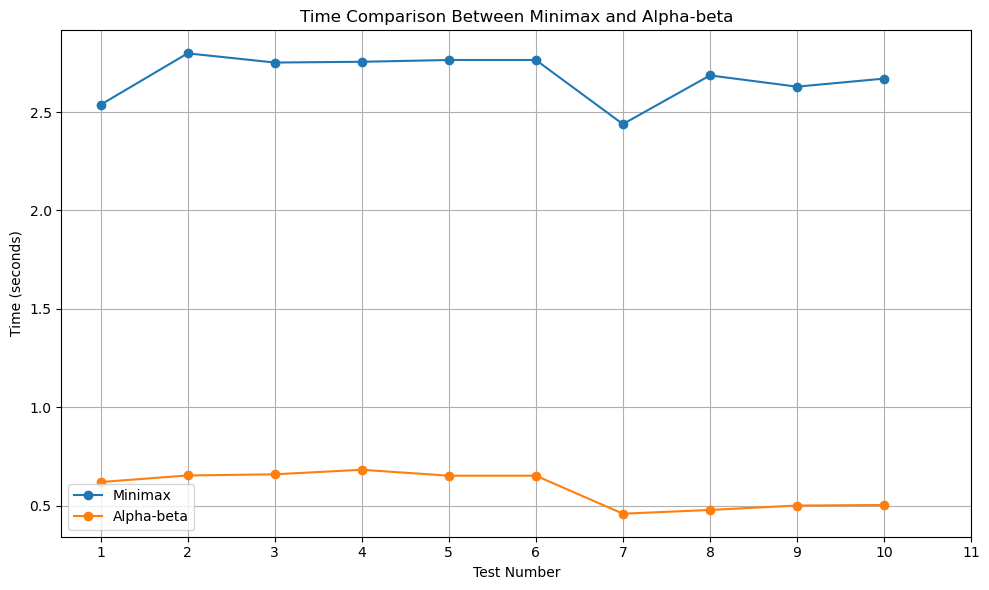

In [1]:
import matplotlib.pyplot as plt

# Data for Minimax and Alpha-beta times
minimax_times = [2.5371738501957486, 2.7983267988477434, 2.7516607557024275, 2.755480561937605, 2.764540433883667,
                 2.764540433883667, 2.4388381873860077, 2.6861907454097973, 2.629078921149759, 2.670043805066277]
alphabeta_times = [0.6203893593379429, 0.653767432485308, 0.6596414191382272, 0.6827502931867327, 0.6527137415749686,
                   0.6527137415749686, 0.45955530334921446, 0.47857806261848, 0.5010507808012121, 0.5037081802592558]

# Plotting
plt.figure(figsize=(10, 6))

# Plot for Minimax
plt.plot(range(1, 11), minimax_times, marker='o', label='Minimax')

# Plot for Alpha-beta
plt.plot(range(1, 11), alphabeta_times, marker='o', label='Alpha-beta')

plt.title('Time Comparison Between Minimax and Alpha-beta')
plt.xlabel('Test Number')
plt.ylabel('Time (seconds)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

## Conclusões

[Go back to the top](#Índice)

### A Star

A má performance do A star é devido a este não ter acesso ou capacidade de prever jogadas futuras. Um movimento que em teoria é bom para o algoritmo, na próxima jogada pode valer-lhe uma derrota, já que este não a conseguiu prever. 

Segundo a heurística dada, o algoritmo vê como mais vantajoso, criar uma sequência de três bolas do que bloquear a sequência criada pelo adversário.

Em contra-partida, alterando a pontuação para uma pontuação mais "defensiva", a dificuldade aumenta, podendo até por vezes ganhar.

Quanto ao tempo de execução, este algoritmo é bastante rápido, também devido à baixa complexidade do jogo.

Podemos concluir que o A-Star não é o algoritmo indicado, não só para este jogo, mas também para jogos multiplayer.

### Monte Carlo

Passando agora para o segundo algoritmo pedido, este revela-se bastante eficaz para o problema em estudo. Verificamos também através de vários testes que, alterando alguns dados (como as iterações ou o valor do C) o algoritmo apresentava um desempenho melhor ou pior, dependendo das alterações. Em termos de tempo de execução, este algoritmo é o que demora mais tempo apresentando uma diferença considerável em relação aos outros.

### Minimax/AlphaBeta

Passando agora para os algoritmos extras, estes foram os que apresentaram melhor desempenho a nível de tempo de execução e vitórias obtidas. Em termos de tempo de execução, verificamos que o Minimax demorava cerca de 3s a executar o movimento. Decidimos então implementar também o corte Alpha-beta que elimina estados que já não precisam de ser visitados.
Com esta adição, o tempo passou para 0.5s